##Projeto Visualização da Informação

Vitor Hugo Santos da Silva

RGM:32126565

Bibliotecas importadas

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objects as go

Aqui, o arquivo foi importado utilizando o pandas e também foi gerado a tabela.

In [52]:
data = pd.read_csv("BigmacPrice.csv")

In [53]:
data


,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85
...,...,...,...,...,...,...
1941,2022-07-01,AED,United Arab Emirates,18.00,3,6.00
1942,2022-07-01,USD,United States,5.15,1,5.15
1943,2022-07-01,UYU,Uruguay,255.00,41,6.22
1944,2022-07-01,VES,Venezuela,10.00,5,2.00


Checagem para ver se algo estava  faltando nos dados e se havia algum item duplicado, para evitar possíveis erros.

In [54]:
data.isna().sum()


date             0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
dtype: int64

In [55]:
data.duplicated().sum()

0

Renomeando "name" para "country"

In [56]:
data.rename(columns = {'name':'country'}, inplace=True)

Convertendo o date para datetime

In [120]:
data['date'] = pd.to_datetime(data['date'])
data['date'].dtypes;

Criando a coluna year

In [58]:
data['year'] = data['date'].dt.year
data.head()

,date,currency_code,country,local_price,dollar_ex,dollar_price,year
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000
3,2000-04-01,GBP,Britain,1.90,1,1.90,2000
4,2000-04-01,CAD,Canada,2.85,1,2.85,2000


Criando um conjunto de dados dentro do dataframe para usar apenas o Brasil.

In [136]:
data_br = data[data['country'] == 'Brazil']
data_br

,date,currency_code,country,local_price,dollar_ex,dollar_price,year,continent
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,South America
30,2001-04-01,BRL,Brazil,3.60,2,1.80,2001,South America
58,2002-04-01,BRL,Brazil,3.60,2,1.80,2002,South America
91,2003-04-01,BRL,Brazil,4.55,3,1.52,2003,South America
123,2004-05-01,BRL,Brazil,5.40,3,1.80,2004,South America
163,2005-06-01,BRL,Brazil,5.90,2,2.95,2005,South America
204,2006-01-01,BRL,Brazil,6.20,2,3.10,2006,South America
236,2006-05-01,BRL,Brazil,6.40,2,3.20,2006,South America
277,2007-01-01,BRL,Brazil,6.40,2,3.20,2007,South America
318,2007-06-01,BRL,Brazil,6.90,1,6.90,2007,South America


Criação do gráfico de linhas sobre preço do Big Mac No Brasil, em seu valor local, ao longo dos anos de 2000-2022.


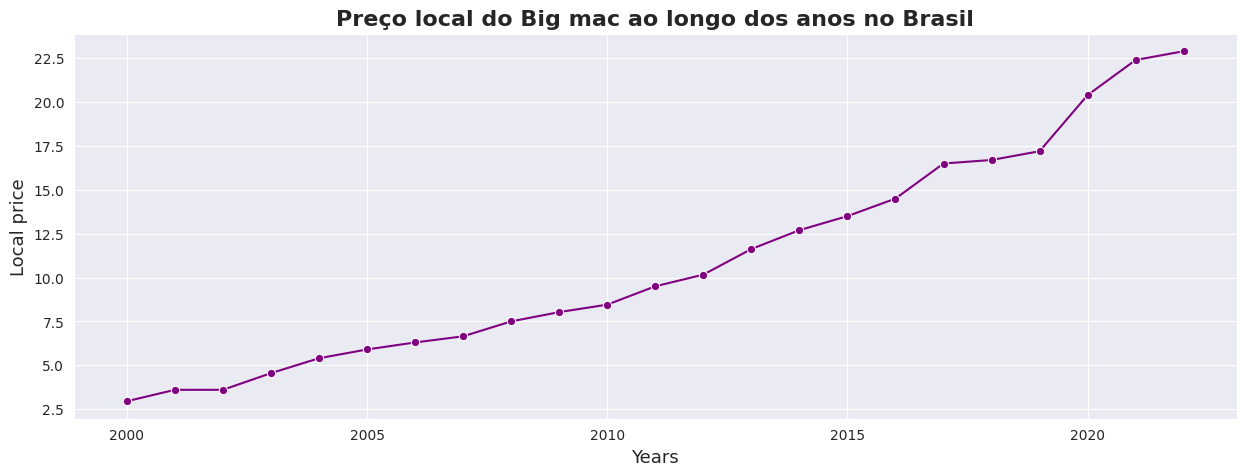

In [122]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
sns.lineplot(data=data_br, x="year", y="local_price", errorbar=None, color="purple", marker='o')
plt.title("Preço local do Big mac ao longo dos anos no Brasil", fontsize=16, fontweight="bold")
plt.ylabel('Local price', fontsize=13)
plt.xlabel('Years', fontsize=13)
plt.show()

Mapeamento dos países em continentes para melhor visualização das informações:

In [75]:
data['continent'] = data.country.map({'Argentina': 'South America',
             'Azerbaijan' : 'Middle East',                      
             'Australia': 'Oceania',
             'Austria' : 'Central Europe',                      
             'Brazil': 'South America',               
             'Belgium' : 'Northwestern Europe',                      
             'Canada': 'North America',
             'Venezuela' : 'South America',                     
             'Switzerland': 'Western Europe',
             'Chile': 'South America',
             'China': 'East Asia',
             'Czech Republic': 'Eastern Europe',
             'Denmark': 'Western Europe',
             'Euro area': 'Europe',
             'Finland' : 'Nothern Europe',                      
             'Britain': 'Western Europe',
             'Hong Kong': 'East Asia',
             'Hungary': 'Eastern Europe',
             'Indonesia': 'South Asia',
             'Ireland': 'Northwestern Europe',                      
             'Japan': 'East Asia',
             'Germany' : 'Central Europe',                      
             'Greece': 'Southeastern Europe',
             'Bahrain' : 'Western Asia',                  
             'South Korea': 'East Asia',
             'Mexico': 'North America',
             'Malaysia': 'South Asia',
             'New Zealand': 'Oceania',
             'Poland': 'Eastern Europe',
             'Russia': 'Eastern Europe',
             'Spain' : 'Southwestern Europe',
             'Portugal' : 'Southwestern Europe',                     
             'Sweden': 'Western Europe',
             'France' : 'Western Europe',                      
             'Italy' : 'Southern Europe',                      
             'Singapore': 'South Asia',
             'Thailand': 'South Asia',
             'India' : 'South Asia',
             'Taiwan': 'East Asia',
             'United States': 'North America',
             'South Africa': 'Southern Africa',
             'Philippines': 'East Asia',
             'Norway': 'Western Europe',
             'Peru': 'South America','Turkey': 'Southwestern Asia',
             'Egypt': 'Middle East',
             'Colombia': 'South America',
             'Costa Rica': 'North America',
             'Sri Lanka': 'South Asia',
             'Pakistan': 'Middle East',
             'Saudi Arabia': 'Middle East',
             'Ukraine': 'Eastern Europe',
             'Uruguay': 'South America',
             'Vietnam' : 'Southeastern Asia',                      
             'Israel': 'Middle East',
             'Netherlands': 'Northwestern Europe',
             'United Arab Emirates': 'Western Asia',
             'Estonia': 'Northern Europe',
             'Guatemala': 'North America',
             'Moldova': 'Eastern Europe',
             'Nicaragua': 'North America',
             'Lithuania': 'Northeastern Europe',
             'Slovakia': 'Central Europe',
             'Slovenia': 'Central Europe',
             'Honduras': 'North America',
             'Oman': 'Southwestern Asia',
             'Lebanon':'Western Asia',
             'Kuwait': 'Middle East',
             'Jordan' : 'Middle East',                      
             'Latvia': 'Northern Europe',
             'Croatia' : 'Southeastern Europe',                      
             'Romania': 'Southeastern Europe',                   
             'Qatar': 'Western Asia',
             })

In [77]:
data['continent'].unique()

array(['South America', 'Oceania', 'Western Europe', 'North America',
       'East Asia', 'Eastern Europe', 'Europe', 'South Asia',
       'Middle East', 'Southern Africa', 'Southwestern Asia', nan,
       'Central Europe', 'Northwestern Europe', 'Northern Europe',
       'Nothern Europe', 'Southeastern Europe', 'Southern Europe',
       'Southwestern Europe', 'Northeastern Europe', 'Southeastern Asia',
       'Western Asia'], dtype=object)

Criação do Gráfico em barras sobre o preço médio em dólar do Big Mac em diferentes continentes ao longo dos anos.

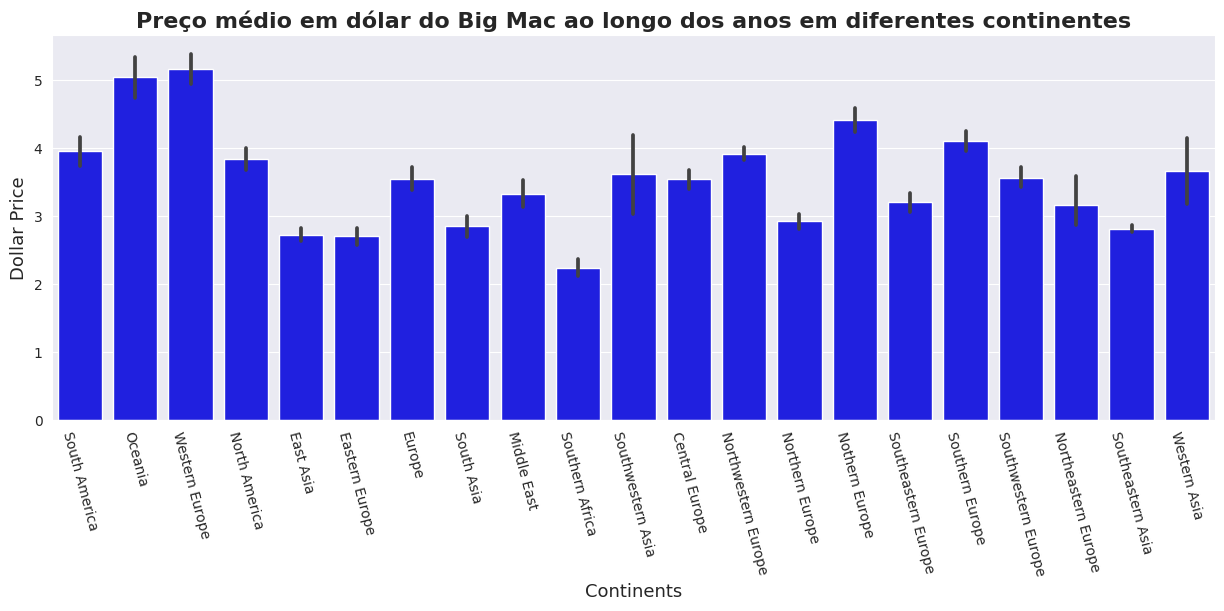

In [88]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
sns.barplot(data=data, x="continent", y="dollar_price", color="blue")
plt.title("Preço médio em dólar do Big Mac ao longo dos anos em diferentes continentes", fontsize=16, fontweight="bold")
plt.ylabel('Dollar Price', fontsize=13)
plt.xlabel('Continents', fontsize=13)
plt.xticks(rotation = -75)
plt.show()

Separação do conjunto de dados de 2017 de dentro do dataframe para que apenas o mesmo seja o utilizado.

In [144]:
data_2017 = data[data['year'] == 2017]
data_2017

,date,currency_code,country,local_price,dollar_ex,dollar_price,year,continent
1130,2017-01-01,ARS,Argentina,55.00,15,3.67,2017,South America
1131,2017-01-01,AUD,Australia,5.80,1,5.80,2017,Oceania
1132,2017-01-01,EUR,Austria,3.40,1,3.40,2017,Central Europe
1133,2017-01-01,EUR,Belgium,3.95,1,3.95,2017,Northwestern Europe
1134,2017-01-01,BRL,Brazil,16.50,3,5.50,2017,South America
...,...,...,...,...,...,...,...,...
1237,2017-07-01,UAH,Ukraine,44.00,25,1.76,2017,Eastern Europe
1238,2017-07-01,USD,United States,4.50,1,4.50,2017,North America
1239,2017-07-01,UYU,Uruguay,130.00,28,4.64,2017,South America
1240,2017-07-01,VEF,Venezuela,10950.00,2700,4.06,2017,South America


Criação do gráfico hierárquico de treemaps retangulares, aonde podemos visualizar o continente e seus países, juntamente com o valor em sua moeda oficial de um Big mac em cada local. 

In [145]:

fig = px.treemap(data_2017, path=['continent', 'country'], values='local_price')
fig.show()